# L3 de Génétique - Magistère Européen de Génétique  
# Travaux pratiques de Génétique Humaine 
##    - Identification d'un gène impliqué dans des infertilités ovariennes prématurées - 

Ces TP vous permettront de mettre en pratique et d'approfondir les notions de Génétique Humaine vues en cours.   
Dans ce notebook TP2, vous allez poursuivre l'analyse génétique de la famille consanguine MO1. 

<div class="alert alert-block alert-info"> 
   
<em>   <b>Commencez par faire une copie de ce notebook, par sécurité (en faisant un clic droit + Duplicate). </b><br>
Rappel : Vous pouvez prendre des notes directement dans ce notebook, en ajoutant une cellule Markdown en cliquant sur l'icône <kbd>➕</kbd> dans la barre des menus, et en choisissant son format dans le menu déroulant. 
</em>
</div>

<mark>Si vous ajoutez des cellules avec vos commentaires, ou que vous modifiez des cellules existantes, **n'oubliez pas d'enregistrer votre notebook**.<mark>

Lors du TP1, vous avez réalisé une analyse de liaison sur le génome entier, et vous avez identifié trois régions du génome susceptibles de contenir la mutation responsable de l'IOP dans cette famille.  
Ce TP2 est consacré à :   
**Première partie :**
- la délimitation des régions d'intérêt sur la carte génétique
- la délimitation des régions d'intérêt sur la carte physique du génome, l'utilisation des sites University of California Santa Cruz (UCSC) et Ensembl regroupant les résultats du projet Génome Humain
- les relations entre cartes génétique et physique

**Deuxième partie :**
- la recherche d'informations sur des marqueurs microsatellites, également génotypés pour cette famille
- la reconstitution des haplotypes chez les individus étudiés.


-----   


### A - Première partie : délimitation des régions de liaison

Au cours du TP1 vous avez constaté une liaison significative pour 3 régions du chromosome 7. Nous allons maintenant délimiter précisément ces pics de liaison.


__1 - Délimitation des pics__   

Les résultats de l'analyse de laison ont été écrits par Merlin dans un fichier tabulé (dont les colonnes sont séparées par des tabulations).   
Pour voir comment ce fichier est structuré, exécutez la cellule suivante :  

In [ ]:
head ~/l3meg-gh-tp1/MO1-snp-parametric.tbl

Parmi les colonnes du fichier .tbl, vous trouverez ALPHA et HLOD.
- ALPHA : proportion de familles présentes dans le fichier .ped qui donnent un lod score supérieur à 0 (en faveur de la liaison génétique) 
Comme ici il n'y a qu'une seule famille analysée, cette colonne peut prendre seulement les valeurs 0 ou 1.
- HLOD : valeur maximum de l' "heterogeneity LOD score", calculé en ne considérant que les familles ayant un lod score supérieur à 0.
Là encore, avec une seule famille analysée, si le lodscore est positif, il sera forcément dû à la famille MO1DA.
   
   
 **Question 1 -** <span style="color:blue">  A quoi correspondent les autres colonnes du fichier MO1-snp-parametric.tbl ?<br>
 </span>

*Votre réponse...*

Le fichier MO1-snp-parametric.tbl contient l'analyse sur tous les chromosomes, et pour les 2 modèles. Nous allons donc extraire uniquement les résultats pour le chromosome 7.  

<div style="width: px; padding-top:10px; padding-bottom:10px; padding-left:5px; border: 0px solid #e6e6e6; text-align: left;background: #e6e6e6;">  
Exécutez la cellule suivante, qui va faire tourner un petit Script R, qui va : <br>
- charger le contenu du fichier MO1-snp-parametric.tbl dans une dataframe <br>
- en extraire les lignes correspondant au chromosome 7  <br>
- les trier par positions et selon le modele (pour séparer les lignes modele1 des lignes modele2)  <br>
- écrire un fichier de sortie texte  <br>
- créer 3 graphiques pour afficher la courbe de liaison sur tout le chomosome et pour chaque pic.<br>
</div>

In [ ]:
### Cellule Code n° 1
# la commande R scrpt suivie du nom du script permet de lacer un script R depuis une cellule bash

Rscript script1-picsLiaison.R

Les graphiques sont dans le fichier <kbd>Rplots.pdf</kbd>, et les détails des lodscores dans le fichier <kbd>lodscores-Chr7-byModel.txt</kbd> (à gauche).  
Ouvrez les avec un double-clic. 

**Délimitation des pics**   
Afin de délimiter la région de liaison génétique nous allons choisir le critère suivant :    
<span style="color:red">région chromosomique ayant un Zmax (LOD score maximum) significatif et dont la bordure est définie par **un ensemble de 10 marqueurs génétiques consécutifs ayant un LOD score inférieur à (Zmax-2).** 
<br>  </span>   

**Question 2-** <span style="color:blue">  En utilisant les données fournies au-dessus et dans ce fichier, commencez à remplir les informations demandées :   
    - Zmax   
    - frontières des pics avec le nom des marqueurs  
    dans cette page :   <br>
  <br>  </span>


Groupes du Lundi (présentiel & zoom) : https://docs.google.com/spreadsheets/d/1fgARuvJBJlSPcz-TXZ6i_Ddfpx-dE_8REg4f2RKoFZQ/edit?usp=sharing  

Groupe du Mardi - A (présentiel + zoom , salle FF) : https://docs.google.com/spreadsheets/d/1LUehGv1vIWfIXpzJfzOBkQ4RIK-f8GUGaWSaCTRO7hg/edit?usp=sharing     
Groupe du Mardi - B (présentiel, salle SC) :  https://docs.google.com/spreadsheets/d/1EdRYypQnEEYgJxRAZ_0ljcgBzAr7YU836PQ87W7ELUA/edit?usp=sharing

----   
__2 - Récupération des informations pour des marqueurs spécifiques : Positions génétiques et physiques__   

Maintenant que vous avez trouvé quels marqueurs délimitent la région, nous allons rechercher les informations permettant de les placer sur les différentes cartes génomiques.   


Nous allons commencer par récupérer dans le fichier MO1.map les données correspondant à leur position génétique.   
Pour rappel, les données sont présentes dans ce dossier sur le serveur :  

<kbd>/srv/data/meg-l3-gh/DataTP1/SNP/ </kbd>  
dont vous pouvez voir le contenu avec la commande suivante :

In [ ]:
### Cellule Code n° 2

ls -l /srv/data/meg-l3-gh/DataTP1/SNP/

Nous avions vu lors du TP1 que les informations de positions génétiques sont dans le fichier MO1.map. Il n'y a pas d'entêtes dans ce fichier, mais vous pouvez avoir une idée de sa structure en affichant les premières lignes : 

In [ ]:
### Cellule Code n° 3

head /srv/data/meg-l3-gh/DataTP1/SNP/MO1.map

**Question 3-** <span style="color:blue"> Où est situé le marqueur SNP_A-1780612 ? <br>
    Quelle unité est utilisée pour la mesure dans la 3ème colonne ? <br>  </span>

*Votre réponse...*

Pour rechercher les informations d'un marqueur particulier, la commande grep est très utile , et très simple d'utilisation.  
Sa syntaxe est :  

On peut donc chercher le marqueur par son nom, ici le marqueur SNP_A-1780616 :

In [ ]:
### Cellule Code n° 4

grep SNP_A-1780616 /srv/data/meg-l3-gh/DataTP1/SNP/MO1.map

Une variante permet de rechercher plusieurs éléments en même temps : 

In [ ]:
### Cellule Code n° 5

grep -E 'SNP_A-1780616|SNP_A-1780617|SNP_A-1780618' /srv/data/meg-l3-gh/DataTP1/SNP/MO1.map

<div style="width: px; padding-top:10px; padding-bottom:10px; padding-left:5px; border: 0px solid #e6e6e6; text-align: left;background: #e6e6e6;">  
Dans la cellule de code après celle-ci, composez la commande vous permettant de compléter le tableau pour les marqueurs bornant le pic attribué à votre groupe.
</div>

In [ ]:
### Cellule Code n° 6



Positions physiques :   
Les positions physiques sur le chromosomes sont présentes dans un autres fichier, fourni par le fabricant de la puce ayant servi à faire les génotypage.   
Les SNPs utilisés lors de notre analyse de liaison ont été génotypés sur une puce 250K fabriquée par la société Affymetrix. 250K signifie que la puce permet de génotyper environ 250000 SNP.    
Affymetrix fournit avec la puce un fichier (Marqueurs_Affy250K-to-RefSNP.csv)

In [ ]:
### Cellule Code n° 7

head -n 25 /srv/data/meg-l3-gh/DataTP1/SNP/Marqueurs_Affy250K-to-RefSNP.txt

Le fichier a la structure suivante :   
- lignes 1 à 20 : des informations diverses (entre autres la version des cartes physiques du génome utilisées comme références -cf. suite du TP).
- à partir de la ligne 21 :   
	- les noms des marqueurs génétiques génotypés, en code spécifique à la société Affymetrix   
	- les noms des marqueurs génétiques génotypés, avec la nomenclature RefSNP (rs...)   
	- le chromosome où sont situés les SNP   
	- la position des SNP sur la carte physique   
	- le brin de référence pour les allèles des SNP puis les deux allèles du SNP (pour les SNP, les allèles sont indiqués pour l'un des brins complémentaires de l'ADN, indiqués brins + et -).   


Afin de vous documenter sur la nomenclature des SNPs (RefSNP), suivez le lien :
 http://www.ncbi.nlm.nih.gov/books/NBK44417/#Content.what_is_a_reference_snp_or__rs_i 


**Question 4-** <span style="color:blue"> Retrouvez les informations suivantes : <br>
    - indiquez sur quel site le lien fourni vous a orienté  <br>
    - à partir des explications qui vous sont données, expliquez à quoi correspond le code rs des SNPs  <br>
    - en quoi peut vous être utile cette conversion de nom vers le code RefSNP ? <br>  </span>

*Votre réponse...*

**Question 5-** <span style="color:blue"> En utilisant la commande grep comme ci-dessus, et en utilisant les informations du fichier Affymetrix, complétez dans votre tableau de pics : <br>
    - les noms des SNP dans le code RefSNP. <br>
    - le code RefSNP de chacun des SNPs bornant les régions de liaison génétique <br>
    - la position physique de ce SNP <br> 
    - les allèles de ce SNP <br> - le brin (« Strand ») pris comme référence pour les allèles. <br>  </span>

In [ ]:
### Cellule Code n° 8

grep 

----   
__3 - Récupération d'informations dans des bases de données : Positions physiques et versions de génomes__   

Les informations sur les SNP (codes, positions sur les cartes physiques, la nature des allèles, etc...) sont répertoriées dans des banques de données. Ces banques de données ont des versions différentes, correspondant à des mises à jour effectuées régulièrement.

**Question 6-** <span style="color:blue">Parmi les 20 premières lignes, trouvez les informations suivantes : <br>
    - la version de la banque de données du génome humain selon la banque de données de l'University of California Santa Cruz (#%genome-version-ucsc) <br>
    - la version de la banque de données du génome humain selon la banque de données du NCBI (#%genome-version-ucsc)  <br>
    - la date de création de cette version du génome (#%genome-version-create_date) <br>
    - la version de la banque de données dbSNP (#%dbsnp-version) <br>  </span>

*Votre réponse...*

A propos de la banque de données dbSNP : rendez vous sur le portail de la banque de données (https://www.ncbi.nlm.nih.gov/snp/).   
Dans le bandeau noir vous trouverez des informations sur ce que contient cette banque de données.   

**Question 7-** <span style="color:blue"> Que contient la banque de données dbSNP ? <br>  </span>

*Votre réponse...*

Vous allez maintenant vérifier la position physique de vos SNPs sur le site de l'University of California Santa Cruz et si besoin leur attribuer leur position sur la dernière carte physique mise à jour pour le génome humain.   

<div style="width: px;  padding-top:10px; padding-bottom:10px; padding-left:5px; border: 0px solid #e6e6e6; text-align: left;background: #e6e6e6;">  
    
- Connectez vous à la banque de données de <a href= "https://genome-euro.ucsc.edu/cgi-bin/hgGateway?redirect=manual&source=genome.ucsc.edu"> l'UCSC </a> <br>   
    
    
- Le génome humain est choisi par défaut. Dans le menu déroulant situé sous "Human Assembly", choisissez la version du génome (selon le NCBI et UCSC) qui était indiquée dans le fichier Marqueurs_Affy250K-to-RefSNP.csv. Cela vous permettra de vérifier les informations fournies dans ce fichier.  <br>   
    
- Dans "Position/Search Term", indiquez le nom de votre premier marqueur avec son code RefSNP  <br>   
    
- Plusieurs choix devraient apparaître à l'écran, faisant référence à la version de la banque de données dbSNP (Simple Nucleotide Polymorphisms). <br>Choisissez la version indiquée dans le fichier Marqueurs_Affy250K-to-RefSNP.csv.   
</div>

   
Une nouvelle page apparaît affichant sous forme graphique la région du génome contenant votre SNP d'intérêt, selon cette version du génome humain. Vous pouvez choisir les informations à afficher à l'écran. Sous la fenêtre, plusieurs chapitres d'informations sont disponibles (le premier s'intitule « Mapping and Sequencing »).   

<div style="width: px;  padding-top:1px; padding-bottom:1px; padding-left:5px; border: 0px solid #e6e6e6; text-align: left;background: #e6e6e6;">
    
- Dans le chapitre « Variation and Repeats », dans la partie SNP (n° de version dans dbSNP), choisissez l'option « pack », puis cliquez sur « refresh ». <br>
</div>


La page se remet à jour pour tenir compte de votre nouveau choix. Les SNPs de la région apparaissent dans la fenêtre (affiché en blanc sur fond noir).   
<div style="width: px;  padding-top:1px; padding-bottom:1px; padding-left:5px; border: 0px solid #e6e6e6; text-align: left;background: #e6e6e6;">  

- Cliquez sur le code RefSNP du SNP que vous avez choisi. 
</div>      
   
Vous ouvrirez une page correspondant à la photo ci-dessous.  

   
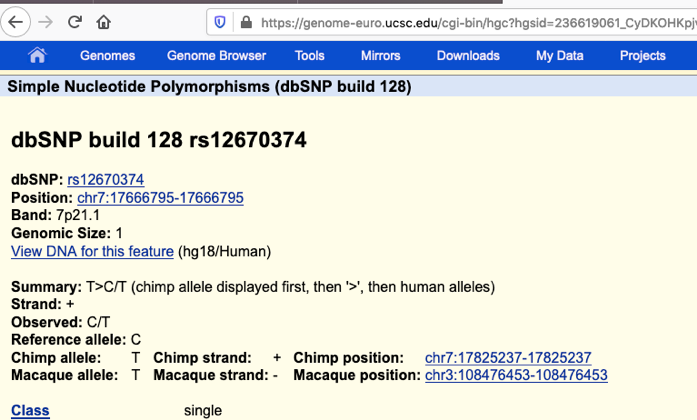



Dans cette nouvelle page, vérifiez que les positions physiques, les allèles et le brin de référence pour les allèles sont identiques à ceux d'Affymetrix.

<div style="width: px;  padding-top:1px; padding-bottom:1px; padding-left:5px; border: 0px solid #e6e6e6; text-align: left;background: #e6e6e6;">   
    
- Complétez votre tableau, puis faites de même pour chacun de vos SNP.   <br>
Il vous suffit de retourner en arrière une fois et d'entre le code RefSNP du marqueur suivant dans la case de recherche. Pensez à noter :  <br>
	- la position physique dans UCSC <br>
	- le brin de référence des allèles <br>
	- les allèles observés pour le SNP<br>
</div>

<div style="width: px;  padding-top:1px; padding-bottom:1px; padding-left:5px; border: 0px solid #e6e6e6; text-align: left;background: #e6e6e6;">   

- Comparez les informations obtenues avec le fichier Affymetrix et sur le site UCSC.
</div>
**Question 8-** <span style="color:blue"> Les allèles indiqués sont-ils toujours les mêmes ? Le brin de référence est-il toujours le même ? <br>  </span>


*Votre réponse...*

----   

**4 - Réajustement de la position physique des SNPs vers la dernière carte physique mise à jour**  

- Entrez le lien suivant dans votre navigateur afin de vous informer sur les différentes versions du génome humain: http://genome-euro.ucsc.edu/FAQ/FAQreleases.html   

**Question 9-** <span style="color:blue">Combien de versions du génome humain ont été réalisées ? <br>
    De quand date la dernière version ? <br>
    Quel est son code selon UCSC (UCSC version) ? <br>
    Quel est le nom de cette version du génome humain (Release name) ? <br>  </span>  


La position physique des SNP peut changer d'une version du génome à l'autre. L'étape suivante va permettre de réajuster la position de vos SNPs vers la dernière mise à jour du génome. Vous allez utiliser un outil en ligne disponible sur le site de l'UCSC : **LiftOver**.


<div style="width: px;  padding-top:1px; padding-bottom:1px; padding-left:5px; border: 0px solid #e6e6e6; text-align: left;background: #e6e6e6;">   
    
- Revenez sur la première page de l'UCSC <a href= "http://genome-euro.ucsc.edu"> (http://genome-euro.ucsc.edu) </a>, puis choisissez de nouveau « Genome Browser » dans le ruban bleu.  <br>   
    
- En haut de la nouvelle page, dans le menu « Tools », choisissez <b>LiftOver</b>  <br>   
    
- Dans les onglets Original Genome, Original Assembly, New Genome et New Assembly, choisissez les options qui vous permettront de mettre à jour la position physique de vos SNPs    (Original représente les versions indiquées dans le fichier Affymetrix, et New la version du génome plus récente).   <br>    

- Entrez la position physique de vos SNP dans la case « Paste in data (BED or chrN:start-end formats) ». Vous devez respecter un format de fichier classique (***format bed***) :    chrN:start-end.   <br>  
	- chrN : numéro du chromosome  <br> 
	- start : position physique de début du marqueur génétique (en pb)   <br>
	- end : position physique de fin du marqueur génétique (en pb)<br>
Attention : les minuscules sont à respecter <br>
<br>
- cliquez sur **Submit** pour lancer la conversion <br>
- sous la fenêtre que vous avez complétée, récupérez vos résultats dans **Results** en cliquant sur **View Conversions**.  <br>
- Complétez votre tableau avec les positions physiques les plus récentes.  <br>
- Calculez la différence entre les positions physiques sur ces deux versions du génome humain.
</div>
    

   
**Question 10-** <span style="color:blue"> La position des SNP a-t-elle changé entre les versions du génome ? <br> 
    Ont-ils tous changé du même nombre de paires de bases ? <br>  </span> 

*Votre réponse...*

----   
**4 - Relation entre cartes génétique et physique**   

Vous allez étudier la relation entre distances génétique et physique, en utilisant les positions physiques (version *la plus récente* de la carte physique).

**Question 11-** <span style="color:blue"> A combien s'élève le rapport moyen cM/Mb dans le génome (information du cours) ? <br> </span> 
Entrez cette valeur dans la case à droite du tableau.

<div style="width: px;  padding-top:10px; padding-bottom:10px; padding-left:5px; border: 0px solid #e6e6e6; text-align: left;background: #e6e6e6;">   
    
- Calculez la taille de chaque région de liaison en cM (calculez la différence entre les positions de début et de fin de chaque région), en Mb et faites le rapport cM/Mb.   
- Vous ferez le même travail pour les régions intermédiaires entre les pics (exemple : SNP de fin du Pic 1 et SNP de début du pic 2). 
</div>   
    
**Question 12-** <span style="color:blue"> Le rapport cM/Mb est-il le même en fonction des régions ? <br> </span> 





*Votre réponse...*

----   

-----   


### B - Deuxième partie : reconstruction des haplotypes partagés entre patientes

Une analyse de liaison a été réalisée sur des micro-satellites en parallèle de votre travail sur les SNPs.    
Le tableau en ligne microsat.tbl.xls vous indique le lod score (Z) obtenu pour chaque microsatellite (Marker). Les microsatellites sont positionnés sur une carte génétique en cM (Map (cM)).

Groupe du lundi : https://docs.google.com/spreadsheets/d/1RcePGlNXJP09jNJkGoycRdHIwyKp0BHsrmtQJJA6hz8/edit?usp=sharing  
Groupe du mardi (salle FF) : https://docs.google.com/spreadsheets/d/1IrO-r7lNcwhBAH6jdaXjsU_VKU8ea_V2dZpK49f5ZUc/edit?usp=sharing   
Groupe du mardi (salle SC) : https://docs.google.com/spreadsheets/d/1qJJ0BfAi_kH1UrDUodElF8i1cHkw_DDnFmtAe6I7zkw/edit?usp=sharing   
   
__1 - Position des microsatellites sur la carte génétique__     

<div style="width: px;  padding-top:1px; padding-bottom:1px; padding-left:5px; border: 0px solid #e6e6e6; text-align: left;background: #e6e6e6;">   

- Connectez-vous sur Ensembl, autre banque de données du génome humain (http://www.ensembl.org/index.html).
- Dans la partie centrale de l'écran (Favourite genomes) choisissez Human (GRCh38.p13).
- Dans la fenêtre de recherche, tapez le code de l'un des microsatellites déjà positionnés (par exemple D7S630) et lancez la recherche. Consultez les différents liens qui s'affichent. 
</div>

**Question 13-** <span style="color:blue"> A quelle carte correspondent les positions génétiques indiquées dans le fichier microsat.tbl.xls ?  <br> </span>   

*Votre réponse...*

<div style="width: px;  padding-top:1px; padding-bottom:1px; padding-left:5px; border: 0px solid #e6e6e6; text-align: left;background: #e6e6e6;">   

- La position génétique de certains marqueurs est manquante dans le fichier.   
En utilisant Ensembl, positionnez-les sur la carte génétique. Notez leur position dans le tableau microsat.tab.xls
</div>

<br>
<span style="color:red">
Etudiants avec noms de famille de A à D : <br>
D7S2421 <br>
D7S2430<br>
D7S2435 <br>
D7S2443<br>
D7S2446<br>
D7S2453<br>
<br> </span> 
<span style="color:purple">
Etudiants avec noms de famille de E à K : <br>
D7S2516  <br>
D7S2518 <br>
D7S2526 <br>
D7S2557 <br>
D7S477 <br>
D7S484 <br>
<br> </span> 

<span style="color:blue">
Etudiants avec noms de famille de L à P : <br>
D7S493 <br>
D7S502<br>
D7S507<br>
D7S510<br>
D7S513<br>
D7S516<br>
<br> </span> 

<span style="color:green">
Etudiants avec noms de famille de R à Z :<br>
D7S517 <br>
D7S518 <br>
D7S519 <br>
D7S524 <br>
D7S526 <br>
D7S669 <br>
<br> </span>     

<div style="width: px;  padding-top:10px; padding-bottom:1px; padding-left:5px; border: 0px solid #e6e6e6; text-align: left;background: #e6e6e6;">   

A l’aide du tableau complété et réordonné, délimitez la ou les région(s) de liaison génétique obtenue(s) par l'analyse des microsatellites.
Comparez les résultats obtenus en analyse de liaison grâce aux microsatellites avec vos résultats sur SNPs. 
</div>
   
**Question 14-** <span style="color:blue"> Existe-t-il un chevauchement de certains pics de liaison ?  <br> </span> 

*Votre réponse...*

----

__2 - Reconstitution des haplotypes dans une région de liaison__     

Pour reconstituer les haplotypes de la grande région en 7q, vous avez à votre disposition les génotypes des individus pour les microsatellites et 6 SNPs dans le tableau **génotypes-MO1-7q** ici :
https://docs.google.com/spreadsheets/d/1F3o1Cfj_sm1OMWJ0FVk2-oSqYgBI3ivomqqpcONVAns/edit?usp=sharing

ainsi qu'un arbre à compléter dans le **fichier-haplotype.xls** : https://drive.google.com/file/d/17199-qBejw24ABoby8wmRY22PaDUDPHi/view?usp=sharing

<div class="alert alert-block alert-warning">

**Travail à rendre en trinôme (pas les mêmes trinômes qu'au TP1) :** <br>

- Faites une copie du fichier fichier-haplotype ***sur votre drive*** <br>
- Complétez les données de cartographie manquantes dans le fichier-haplotypes <br>
- En utilisant les deux fichiers fichier-haplotypes.xls et genotypes-MO1-7q.xls, **placez les numéros des individus sur l’arbre**, 
    puis **complétez les haplotypes des individus** pour lesquels 2 barres grises sont figurées. 
    Les consignes vous sont rappelées dans le cadre en haut à droite de l’arbre. <br>
- Les haplotypes sont-ils cohérents avec le modèle génétique utilisé ? <br>
- Pouvez-vous voir si des recombinaisons ont eu lieu lors de la formation des gamètes ? <br>
- **Délimitez la région d’intérêt (sous forme d’un cadre)** <br>
- Dans la liste des marqueurs à gauche, **mettez en évidence les marqueurs bornant cette région d’intérêt.** <br>

<br>
Vous rendrez le lien vers votre fichier-haplotypes.xls complété dans la rubrique Devoir TP2 sur Moodle.<br>
 
</div>

----

<div class="alert alert-block alert-success"><b>
    N'oubliez pas de sauver ce notebook pour garder vos notes. </b> <br>
    Vous pouvez en faire un export en format html : <br>
- Ouvrez "File" dans le Menu<br>
- Selectionnez "Export Notebook As"<br>
- Exportez votre notebook en HTML<br>
- Vous pouvez maintenant l'ouvrir dans un navigateur sans être connecté à Plasma ! 
</div>

-----

<div class="alert alert-block alert-info"> 
<b><em> Rappels sur les notebooks jupyter :</em></b><br>
- To add a new cell, click on the <kbd>➕</kbd> icon in the toolbar above your notebook <br>
- You can "click and drag" to move a cell up or down <br>
- You choose the type of cell in the toolbar above your notebook: <br>  
        'Code' to enter command lines to be executed <br>
        'Markdown' cells to add text, that can be formatted with some characters <br><br>
- To execute a 'Code' cell, press <kbd>SHIFT</kbd>+<kbd>ENTER</kbd> or click on the <kbd>▶︎</kbd> icon  <br>
- To display a 'Markdown' cell, press <kbd>SHIFT</kbd>+<kbd>ENTER</kbd> or click on the <kbd>▶︎</kbd> icon  <br>
- To modify a 'Markdown' cell, double-click on it <br>
<br>    
<em>  
To make nice html reports with markdown: <a href="https://dillinger.io/" title="dillinger.io">html visualization tool 1</a> or <a href="https://stackedit.io/app#" title="stackedit.io">html visualization tool 2</a>, <a href="https://www.tablesgenerator.com/markdown_tables" title="tablesgenerator.com">to draw nice tables</a>, and the <a href="https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd" title="Ultimate guide">Ultimate guide</a>. <br>
Further reading on JupyterLab notebooks: <a href="https://jupyterlab.readthedocs.io/en/latest/user/notebook.html" title="Jupyter Lab">Jupyter Lab documentation</a>.<br>
Here we are using JupyterLab interface implemented as part of the <a href="https://plasmabio.org/" title="plasmabio.org">Plasmabio</a> project led by Sandrine Caburet, Pierre Poulain and Claire Vandiedonck.
</em>
</div>
